In [2]:
import pandas as pd

In [4]:
datos = pd.read_excel('supervivencia_examenes.xlsx')
datos

,id,tiempo,examen,calificación,género
0,1,85,1,100.0,m
1,2,109,1,100.0,m
2,3,118,1,100.0,m
3,4,120,1,100.0,f
4,5,106,1,98.0,f
5,6,103,1,98.0,m
6,7,108,1,96.0,f
7,8,119,1,96.0,f
8,9,115,1,96.0,f
9,10,108,1,94.0,f


In [6]:
datos = pd.get_dummies(datos,'género', drop_first=True )
datos

,id,tiempo,examen,calificación,género_m
0,1,85,1,100.0,1
1,2,109,1,100.0,1
2,3,118,1,100.0,1
3,4,120,1,100.0,0
4,5,106,1,98.0,0
5,6,103,1,98.0,1
6,7,108,1,96.0,0
7,8,119,1,96.0,0
8,9,115,1,96.0,0
9,10,108,1,94.0,0


a) Estadísticas descriptivas. Calcule el tiempo promedio que tardaron en
responder los alumnos el examen y la calificación promedio obtenida.
El profesor sospecha que las alumnas responden más rápido el examen,
calcule el tiempo promedio que tardaron en responder las alumnas y su
calificación promedio, asi como el tiempo promedio que tardaron en
responder los alumnos y su calificación promedio.
Elabore un print mostrando dichos resultados

In [7]:
datos['tiempo'].mean()

107.3529411764706

In [8]:
datos['calificación'].mean()

90.70588235294117

In [38]:
datosM = datos[datos['género_m'] == 1]
datosM
promM=datosM['tiempo'].mean()

In [28]:
datosF = datos[datos['género_m'] == 0]
datosF
promF=datosF['tiempo'].mean()

In [34]:
print('La calificación promedio de hombres es de', promM, 'Y la calificacion promedio de mujeres es de ',promF)

La calificación promedio de hombres es de 106.66666666666667 Y la calificacion promedio de mujeres es de  108.125


b) ¿Cómo crees que se comporta el riesgo de entregar el examen conforme
transcurre el tiempo? ¿es constante, creciente, o decreciente? Según tu 
respuesta ajusta un modelo exponencial o Weibull, primero para todos
los individuos y muestra la función de riesgo.

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from lifelines import ExponentialFitter

In [49]:
pip install lifelines

Note: you may need to restart the kernel to use updated packages.


In [57]:
estimador_lamda = datos['examen'].sum()/datos['tiempo'].sum()
estimador_lamda

0.009315068493150684

In [56]:
exf = ExponentialFitter().fit(datos['tiempo'], datos['examen'])

In [58]:
exf.hazard

AttributeError: 'ExponentialFitter' object has no attribute 'hazard'

c) Ahora estima el mismo modelo que planteaste en el inciso anterior, pero
para hombres y mujeres, y grafica ambas funciones de supervivencia
juntas (empalmadas), ¿gráficamente quien tarda más en entregar el
examen?

In [60]:
estimador_lamda = datosM['examen'].sum()/datosM['tiempo'].sum()
estimador_lamda

0.009375

In [63]:
exfM = ExponentialFitter().fit(datosM['tiempo'], datosM['examen'])

In [64]:
exfM.hazard

AttributeError: 'ExponentialFitter' object has no attribute 'hazard'

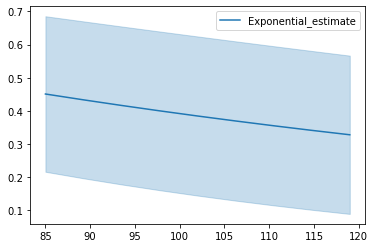

In [65]:
exfM.plot_survival_function()
plt.show()

In [66]:
estimador_lamda = datosF['examen'].sum()/datosF['tiempo'].sum()
estimador_lamda

0.009248554913294798

In [70]:
exfF = ExponentialFitter().fit(datosF['tiempo'], datosF['examen'])

In [72]:
exfF.hazard

AttributeError: 'ExponentialFitter' object has no attribute 'hazard'

In [ ]:
exfH.plot_survival_function()
plt.show()

d) Estime la función de supervivencia del tiempo de entrega del examen de
todos los alumnos utilizando Kaplan-Meier, muestre los valores de la
función de supervivencia, los valores del intervalos de confianza al 95%,
asi como la gráfica respectiva de la función de supervivencia con sus
intervalos

In [ ]:
from lifelines import KaplanMeierFitter 

In [ ]:
kmf = KaplanMeierFitter(label="Duración de entrega del examen")
kmf.fit(datos['tiempo'], datos['examen'])
kmf.plot();

In [ ]:
kmf.survival_function_

In [ ]:
Hombres = datos[datos['género']==0] 
Mujeres = datos[datos['género']==1] 

In [ ]:
kmf1 = KaplanMeierFitter(label="Hombres")
kmf1.fit(Hombres['tiempo'], Hombres['examen'])

kmf2 = KaplanMeierFitter(label="Mujeres")
kmf2.fit(Mujeres['tiempo'],Mujeres['examen']) 

kmf1.plot();
kmf2.plot();